In [1]:
# Connecting libraries
# подключение библиотек

# библиотека для математических операций
import numpy as np

# библиотеки для подключения heatmap (https://seaborn.pydata.org/generated/seaborn.heatmap.html)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# библиотека для подключения regular expressions
import re

In [2]:
# Variable declaration
# объявления переменных

# порядок матрицы
N = 0

# наша матрица
Matrix = []

# Уборщик и его местоположение на матрице
Cleaner = [0,0]

# возможные действия уборщика
Actions = ["move up", "move down", "move left", "move right", "clean"] #row_sub[0], row_add[1], col_sub[2], col_add[3]

# действие уборщика
Action = 0

In [18]:
# Input rank matrix
# функция для введение порядку матрицы (N)

def input_N():
    
#   мы создаем некий флаг (bool) для того чтобы знать правильно ли пользователь ввел переменную
    flag = True
    
#   создаем цикл. Он нужен чтобы при неправильном введении пользователь мог попробывать ввести еще
    while flag:
        
#       переменная в которую записывается то что вводит пользователь
        tmp = input("Please enter the size of the matrix \n(You can only enter 3, 4 or 5):\n")
    
#       rezult_input - переменная которая с помощью регулярных выражений проверяет является ли то что ввел пользователь (tmp) числом
#       если то что ввел пользователь (tmp) это число, то оно запишется в rezult_input
        rezult_input = re.match("^\d+$", tmp)
    
#       если rezult_input будет не пустым (тоесть в него записалось число которое ввел пользователь) 
        if rezult_input is not None:
        
#           если это число не 0, 1 или 2 (отрецательные числа не записались бы с помощю этой регулярки "^\d+$")
            if int(rezult_input.group(0)) != 0 and int(rezult_input.group(0)) != 1 and int(rezult_input.group(0)) != 2:
        
#               изначальному флагу (flag) присвоим False (то есть заканчивает цикл)
                flag = False 

#           иначе выводим ошибку и продолжаем цикл
            else:
                print("You have entered an incorrect value \nPlease try again")
        else:
            print("You have entered an incorrect value \nPlease try again")        
    return int(tmp)

In [5]:
# Сreate matrix

# создаем матрицу. size это N которое уже ввел пользователь
def create_matrix(size):
    
#   с помощью arange создаем одномерный масив.
#   с помощью reshape создаем квадратную матрицу 
    matrix_create = np.arange(size**2).reshape((size,size)) * 0
    return matrix_create

In [6]:
# User address template

# функция для вывода пояснений для пользователя
def print_enter(str):
    tmp1 = "Now you must enter the location of the "
    tmp2 = " \nThis is an input template: [row,column]"
    tmp3 = "\n'row' is a number that indicates the location of the cell in rows"
    tmp4 = "\n'column' is a number that indicates the location of the cell in columns"
    tmp5 = "\nPlease look at the picture carefully before entering"
    tmp6 = "\nThe numbers to the left of the matrix indicate the numbering of the rows"
    tmp7 = "\nThe numbers at the bottom of the matrix indicate the numbering of the columns"
    tmp8 = "\nGood luck!"
    
#   объединение строк
    rez_str = tmp1 + str + tmp2 + tmp3 + tmp4 + tmp5 + tmp6 + tmp7 + tmp8
    return rez_str

In [10]:
# Enter a dirt

# ввод грязи
def input_dirt(matrix):
    
#   вызываем метод show_heatmap чтобы показать пользователю матрицу
    show_heatmap(matrix)
    
#   мы создаем некий флаг (bool) для того чтобы знать правильно ли пользователь ввел местонахождение грязи
    flag_add = True
    
#   вызываем метод для пояснение
    print(print_enter("dirt"))
    
#   создаем цикл. Он нужен чтобы при неправильном введении пользователь мог попробывать ввести еще
    while flag_add:
        
#       создаем переменную location в нее будет записано местонахождение грязи на матрице (это результат метода input_row_col)
        location = input_row_col("dirt")
        
#       если рядок, который ввел пользователь, меньше чем размер матрицы и 
#       столбец, который ввел пользователь, меньше чем размер матрицы
        if location[0] < len(matrix) and location[1] < len(matrix):
        
#           тогда отражаем на матрице на месте, который ввел пользователь, темно синий квадрат
            matrix[location[0], location[1]] = 3

#           запускаем функцию add_more_dirt и ее результат присваиваем flag_add
            flag_add = add_more_dirt(flag_add)
    
#       иначе выводим ошибку и продолжаем цикл
        else:
            print("You have entered an incorrect value \nPlease try again")

#   вызываем метод show_heatmap чтобы показать пользователю обновленную матрицу
    show_heatmap(matrix)
    return matrix

In [9]:
# Adding a dirt

# метод с помощью которого решается хочет ли пользователь добавить еще грязи на матрицу
def add_more_dirt(flag_add):
    
#   мы создаем некий флаг (bool) для того чтобы знать правильно ли пользователь ввел свой ответ
    flag_yn = True
    
#   запускаем цикл. Он нужен чтобы при неправильном введении пользователь мог попробывать ввести еще
    while flag_yn:   
        
#       tmp2 - переменная в которую записывается ответ пользователя
        tmp2 = input("Would you like to add more dirt?" + 
                 "\nEnter y if you want to add" + 
                 "\nEnter n if you don't want to add\n")
    
#       регулярка проверяет ответ пользователя
        reg_yes = re.match('^y$', tmp2)
        reg_no = re.match('^n$', tmp2)

#       если reg_yes (которое означает что пользователь ввел "y") не пустое
        if reg_yes is not None:
        
#           заканчиваем этот цикл
            flag_yn = False
    
#           в flag_add записываем True. Это означает что пользователь хочет добавить еще грязи
            flag_add = True
    
#       иначе: если reg_no (которое означает что пользователь ввел "n") не пустое
        elif reg_no is not None:
        
#           заканчиваем этот цикл
            flag_yn = False
    
#           в flag_add записываем False. Это означает что пользователь больше не хочет добавлять грязи
            flag_add = False
    
#       иначе
        else:
        
#           цикл продолжается так как пользователь ввел некорректное значение
            flag_yn = True
            print("You have entered an incorrect value \nPlease try again")
    return flag_add

In [7]:
# Input cleaner's location

# ввод местонахождение уборщика
def input_cleaner_location(matrix):
    
#   мы создаем некий флаг (bool) для того чтобы знать правильно ли пользователь ввел свой ответ
    flag = True
    
#   вызываем метод для пояснение
    print(print_enter("cleaner"))
    
#   запускаем цикл. Он нужен чтобы при неправильном введении пользователь мог попробывать ввести еще
    while flag:
        
#       новой переменной location присваиваем результат метода input_row_col
        location = input_row_col("cleaner")
            
#       если рядок, который ввел пользователь, меньше чем размер матрицы и 
#       столбец, который ввел пользователь, меньше чем размер матрицы
        if location[0] < len(matrix) and location[1] < len(matrix):
        
#           переменной flag присваиваем False, тоесть этим заканчиваем цикл
            flag = False
    
#           если местоположение которое ввел пользователь имеет значение 3 (что означает что в нем грязь)
            if matrix[location[0], location[1]] == 3:
        
#               этому местоположению присваивается значение 2 (цвет меняется на немного светлей тон)
                matrix[location[0], location[1]] = 2
    
#           иначе: если местоположение которое ввел пользователь имеет значение 0 (что означает что оно чистое)
            elif matrix[location[0], location[1]] == 0:
        
#               этому местоположению присваивается значение 1 (цвет светло голубой)
                matrix[location[0], location[1]] = 1
    
#           иначе вывод ошибки (этот вариант невозможен)
            else:
                print("Error! \nSomething wrong! \nRestart the program")
            
#       иначе вывод неверного введения
        else:
            print("You have entered an incorrect value \nPlease try again")
            
#   вывод обновленной матрицы
    show_heatmap(matrix)
    return matrix

In [8]:
# Enter rows columns for a cell

# ввод рядка и столбца до местоположение уборщика или грязи
def input_row_col(str1):
    
#   переменная в которую будет записыватся местополодение
    location = [0, 0]
    
#   tmp_str - переменная для вывода инструкции пользователю
    tmp_str = "Please enter the location of the " + str(str1) + "\n(Example: [0,1])\n"
    
#   tmp1 - переменная в которую записывается ответ пользователя
    tmp1 = input(tmp_str)
    
#   регулярка для проверки правельности введение (tmp_row для рядка, tmp_col для стовбца),
#   эта проверка не полная продолжение проверки ниже
    tmp_row = re.match('^\[\d+', tmp1).group(0)
    tmp_col = re.search('\d+\]$', tmp1).group(0)

#   если tmp_row не пустой и tmp_col тоже не пустой
    if tmp_row is not None and tmp_col is not None:        
        
#       продолжение проверки регуляркой, результат которой записывается в новый переменные: reg_row и reg_col
        reg_row = re.search('\d+$', re.match('^\[\d+', tmp1).group(0))
        reg_col = re.match('^\d+', re.search('\d+\]$', tmp1).group(0))

#       если reg_row не пустой и reg_col тоже не пустой
        if reg_row is not None and reg_col is not None:
        
#           записываем рядок и столбец в нашу переменну location
            location[0] = int(reg_row.group(0))
            location[1] = int(reg_col.group(0))
        
#       иначе
        else:
            print("You have entered an incorrect value \nPlease try again")
    else:
        print("You have entered an incorrect value \nPlease try again")
    return location

In [3]:
# Matrix visualization

# вывод матрицы на екран (https://seaborn.pydata.org/generated/seaborn.heatmap.html)
def show_heatmap(arr):
    sns.heatmap(arr, vmin=0, vmax=3, annot=False, cbar = False, linewidths=2, linecolor='black', cmap="Blues") 
    plt.show()

In [19]:
# The main method of action

# метод который назначает нужное действие
def action(matrix):
    
#   вызываем метод который ищет местоположение уборщика на матрице и записывает резутьтат поиска в location_cleaner
    location_cleaner = action_location_cleaner(matrix)
    
#   если ряд не равен -1 и столбец не равен -1
    if location_cleaner[0] != -1 and location_cleaner[1] != -1:
        
#       в глобальную переменную записываем местоположение уборщика
        Cleaner = [location_cleaner[0], location_cleaner[1]] 
        
#       если в матрице уборщик находится на грязи
        if matrix[location_cleaner[0], location_cleaner[1]] == 2:
        
#           тогда action_new присваивается 4 (тоесть действие "clean")
            action_new = 4
    
#       иначе
        else: 
        
#           action_new присваивается результат метода action_new_action
            action_new = action_new_action(matrix, location_cleaner)
    
#   иначе ошибка
    else:
        print("Error! \nSomething wrong! \nRestart the program")
    return [action_new, location_cleaner]

In [20]:
# Search for a cleaner in a matrix

# поиск местоположение уборщика на матрице
def action_location_cleaner(matrix):
    
#   переменная которая отображает местоположение уборщика на матрице
    location_cleaner = [-1,-1]
    
#   поиск в матрице значение 2
    tmp = np.where(matrix == 2)[0]
    
#   объявление переменных row и col которым присвоивается -1
    row = -1
    col = -1
    
#   если размер переменной tmp равен 0 (тоесть в матрице не нашло значений 2)
    if tmp.size == 0:
        
#       поиск в матрице значение 1, результат которого присваивается tmp  
        tmp = np.where(matrix == 1)[0]
    
#       если размер переменной tmp равен 0 (тоесть в матрице не нашло значений 1)
        if tmp.size == 0:
        
#           вывод ошибки
            print("Error! \nSomething wrong! \nRestart the program")
    
#       иначе
        else:
        
#           row и col присваиваются значение местоположение уборщика
            row = int(np.where(matrix == 1)[0])
            col = int(np.where(matrix == 1)[1])
        
#   иначе
    else:
#       row и col присваиваются значение местоположение уборщика
        row = int(np.where(matrix == 2)[0])
        col = int(np.where(matrix == 2)[1])
        
#   присваиваем местоположение уборщика location_cleaner 
    location_cleaner = [row,col]
    
#   выводим на екран местоположение уборщика
    print(location_cleaner)
    return location_cleaner

In [22]:
# Assign a new action

# выбор нового действия
def action_new_action(matrix, location_cleaner):
    
#   переменная которая обозначает действий
    action_new = -1

#   дальше я буду писать ряд и столбец. Это означает что location_cleaner[0] - это ряд на котором находится уборщик,
#   а location_cleaner[1] - это столбец на котором находится уборщик, тоесть location_cleaner - это местоположение уборщика

#   если ряд четный и столбец - это не последний столбец матрицы
    if location_cleaner[0] % 2 == 0 and location_cleaner[1] != len(matrix) - 1:
        
#       действие = 3 ("move right")
        action_new = 3
    
#   иначе: если ряд нечетный и столбец - это не первый столбец в матрице
    elif location_cleaner[0] % 2 == 1 and location_cleaner[1] != 0:
        
#       действие = 2 ("move left")
        action_new = 2
    
#   иначе: если столбец - последний столбец матрицы
    elif location_cleaner[1] == len(matrix) - 1:
        
#       если ряд - это последний ряд матрицы
        if location_cleaner[0] == len(matrix) - 1:
        
#           действие = 0 ("move up")
            action_new = 0
    
#       иначе: если ряд четный
        elif location_cleaner[0] % 2 == 0:
        
#           действие = 1 ("move down")
            action_new = 1
    
#   иначе: если столбец - это первый столбец в матрице
    elif location_cleaner[1] == 0:
        
#       если ряд - это последний ряд матрицы
        if location_cleaner[0] == len(matrix) - 1:
        
#           действие = 0 ("move up")
            action_new = 0
    
#       иначе: если ряд четный
        elif location_cleaner[0] % 2 == 1:
        
#           действие = 1 ("move down")
            action_new = 1

#   если действие так и осталось -1
    if action_new == (-1):
        
#       вывод ошибки
        print("Error! \nSomething wrong! \nRestart the program")
    return action_new

In [23]:
# Performing an action

# метод который выполняет действие
def do_action(matrix, action):
    
#   мы создаем некий флаг (bool) для того чтобы знать чистая матрица или нет
    flag = check_matrix_to_dirt(matrix)
    
#   если в матрице есть грязь
    if flag:
        
#       вивод на екран нужного действия
        print("Now the cleaner does: " + Actions[action]) #"move up", "move down", "move left", "move right", "clean"
        
#       если действие = 4 ("clean")
        if action == 4:
        
#           матрица в месте где находится уборщик (Cleaner) очищается
            matrix[Cleaner[0], Cleaner[1]] = 1
    
#       иначе: если действие = 0 ("move up") и матрица нечетная и ряд где находится уборщик - это последний ряд матрицы и 
#       столбик - это последний столбик матрицы 
#       (это условие значит что уборщик дошел до конца матрицы но еще не очистил ее полностю)
        elif action == 0 and len(matrix) % 2 == 1 and Cleaner[0] == len(matrix) - 1 and Cleaner[1] == len(matrix) - 1:
        
#           матрица в месте где находился уборщик (Cleaner) очищается (тоесть уборщик ушел с своего местоположение)
            matrix[Cleaner[0], Cleaner[1]] = 0
    
#           если матрица в [0,0] грязная
            if matrix[0,0] == 3:
        
#               то матрица в [0,0] приобритает темно голубой цвет
                matrix[0,0] = 2
    
#           иначе
            else:
        
#               то матрица в [0,0] приобритает светло голубой цвет
                matrix[0,0] = 1
    
#       иначе: если действие = 0 ("move up") и матрица четная и ряд где находится уборщик - это последний ряд матрицы и 
#       столбик - это первый столбик матрицы 
#       (это условие значит что уборщик дошел до конца матрицы но еще не очистил ее полностю)
        elif action == 0 and len(matrix) % 2 == 0 and Cleaner[0] == len(matrix) - 1 and Cleaner[1] == 0:
        
#           матрица в месте где находился уборщик (Cleaner) очищается (тоесть уборщик ушел с своего местоположение)
            matrix[Cleaner[0], Cleaner[1]] = 0
    
#           если матрица в [0,0] грязная
            if matrix[0,0] == 3:
        
#               то матрица в [0,0] приобритает темно голубой цвет
                matrix[0,0] = 2
    
#           иначе
            else:
        
#               то матрица в [0,0] приобритает светло голубой цвет
                matrix[0,0] = 1
    
#       иначе: если действие = 0 ("move up")
        elif action == 0:
        
#           матрица в месте где находился уборщик (Cleaner) очищается (тоесть уборщик ушел с своего местоположение)
            matrix[Cleaner[0], Cleaner[1]] = 0
    
#           если матрица в верхнем квадрате грязная
            if matrix[Cleaner[0] - 1, Cleaner[1]] == 3:
        
#               то матрица в верхнем квадрате приобритает темно голубой цвет
                matrix[Cleaner[0] - 1, Cleaner[1]] = 2
    
#           иначе
            else:
        
#               то матрица в верхнем квадрате приобритает светло голубой цвет
                matrix[Cleaner[0] - 1, Cleaner[1]] = 1
                
#       иначе: если действие = 1 ("move down")
        elif action == 1:
            
#           матрица в месте где находился уборщик (Cleaner) очищается (тоесть уборщик ушел с своего местоположение)
            matrix[Cleaner[0], Cleaner[1]] = 0
    
#           если матрица в нижнем квадрате грязная
            if matrix[Cleaner[0] + 1, Cleaner[1]] == 3:
        
#               то матрица в нижнем квадрате приобритает темно голубой цвет
                matrix[Cleaner[0] + 1, Cleaner[1]] = 2
    
#           иначе
            else:
        
#               то матрица в нижнем квадрате приобритает светло голубой цвет
                matrix[Cleaner[0] + 1, Cleaner[1]] = 1
                
#       иначе: если действие = 2 ("move left")
        elif action == 2:
            
#           матрица в месте где находился уборщик (Cleaner) очищается (тоесть уборщик ушел с своего местоположение)
            matrix[Cleaner[0], Cleaner[1]] = 0
    
#           если матрица в левом квадрате грязная
            if matrix[Cleaner[0], Cleaner[1] - 1] == 3:
        
#               то матрица в левом квадрате приобритает темно голубой цвет
                matrix[Cleaner[0], Cleaner[1] - 1] = 2
            
#           иначе
            else:
        
#               то матрица в левом квадрате приобритает светло голубой цвет
                matrix[Cleaner[0], Cleaner[1] - 1] = 1
                
#       иначе: если действие = 3 ("move right")
        elif action == 3:
            
#           матрица в месте где находился уборщик (Cleaner) очищается (тоесть уборщик ушел с своего местоположение)
            matrix[Cleaner[0], Cleaner[1]] = 0
    
#           если матрица в правом квадрате грязная
            if matrix[Cleaner[0], Cleaner[1] + 1] == 3:
        
#               то матрица в правом квадрате приобритает темно голубой цвет
                matrix[Cleaner[0], Cleaner[1] + 1] = 2
            
#           иначе
            else:
        
#               то матрица в правом квадрате приобритает светло голубой цвет
                matrix[Cleaner[0], Cleaner[1] + 1] = 1
    
#       иначе ошибка
        else:
            print("Error! \nSomething wrong! \nRestart the program")
            
#   иначе: матрица чистая
    else:
        print("The matrix is cleaned!")
        
#   вывод матрицы на екран
    show_heatmap(matrix)
    return [matrix, flag]

In [24]:
# Check the matrix on dirt

# проверка матрицы на грязь
def check_matrix_to_dirt(matrix):
    
#   флаг проверки
    flag = True
    
#   проверяет есть ли в матрицы числа 2 или 3 
    tmp1 = np.where(matrix == 2)[0]
    tmp2 = np.where(matrix == 3)[0]
    
#   если и 2 нету и 3 нету
    if tmp1.size == 0 and tmp2.size == 0:
        
#       флаг приодберает False (тоесть матрица чиста)
        flag = False
    return flag

Please enter the size of the matrix 
(You can only enter 3, 4 or 5):
3


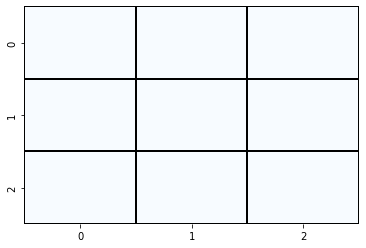

Now you must enter the location of the dirt 
This is an input template: [row,column]
'row' is a number that indicates the location of the cell in rows
'column' is a number that indicates the location of the cell in columns
Please look at the picture carefully before entering
The numbers to the left of the matrix indicate the numbering of the rows
The numbers at the bottom of the matrix indicate the numbering of the columns
Good luck!
Please enter the location of the dirt
(Example: [0,1])
[0,0]
Would you like to add more dirt?
Enter y if you want to add
Enter n if you don't want to add
n


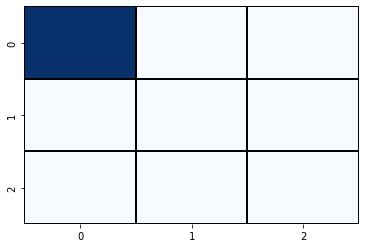

Now you must enter the location of the cleaner 
This is an input template: [row,column]
'row' is a number that indicates the location of the cell in rows
'column' is a number that indicates the location of the cell in columns
Please look at the picture carefully before entering
The numbers to the left of the matrix indicate the numbering of the rows
The numbers at the bottom of the matrix indicate the numbering of the columns
Good luck!
Please enter the location of the cleaner
(Example: [0,1])
[0,1]


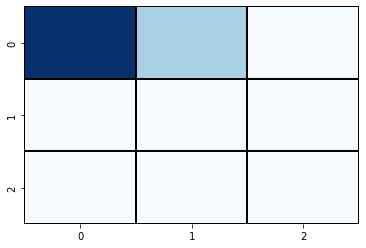

[0, 1]
Now the cleaner does: move right


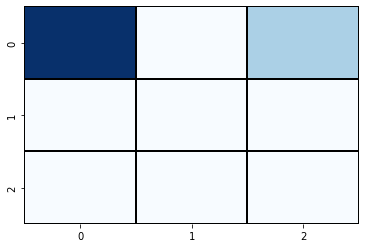

[0, 2]
Now the cleaner does: move down


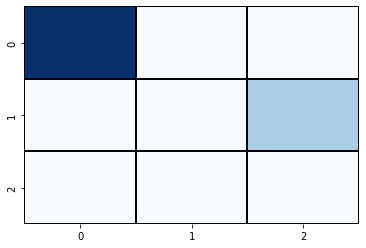

[1, 2]
Now the cleaner does: move left


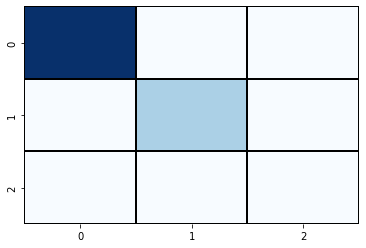

[1, 1]
Now the cleaner does: move left


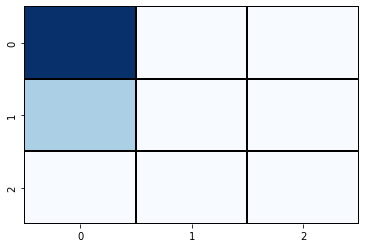

[1, 0]
Now the cleaner does: move down


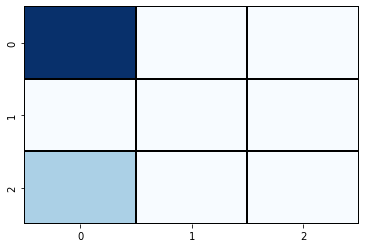

[2, 0]
Now the cleaner does: move right


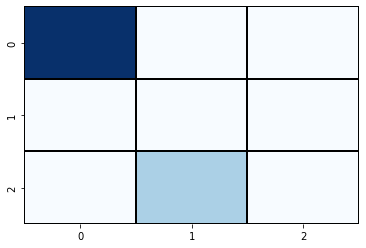

[2, 1]
Now the cleaner does: move right


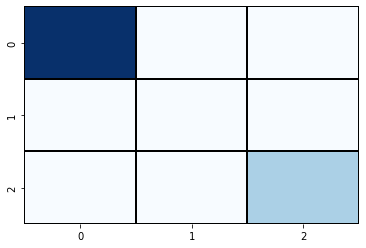

[2, 2]
Now the cleaner does: move up


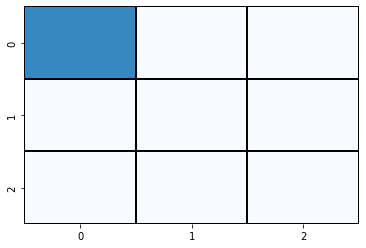

[0, 0]
Now the cleaner does: clean


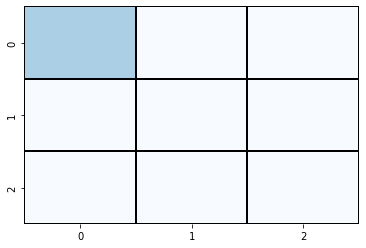

[0, 0]
The matrix is cleaned!


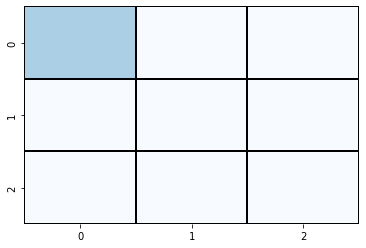

[0, 0]


In [27]:
# Algorithm of program operation

# инициализация размера матрицы
N = input_N()

# создание матрицы
Matrix = create_matrix(N)

# создание на матрицы грязи
Matrix = input_dirt(Matrix)

# создание на матрице уборщика
Matrix = input_cleaner_location(Matrix)

# с метода action добываем действие и местоположение уборщика
tmp = action(Matrix)
Action = tmp[0]
Cleaner = tmp[1]

# инициализируем флаг
flag = True

# инициалицируем цикл
while flag:
    
#   с метода do_action добываем обновленную матрицу и флаг, который показывает чиста ли матрица
    tmp2 = do_action(Matrix, Action)
    Matrix = tmp2[0]
    
#   если матрица чиста
    if tmp2[1]:
        
#       заканчиваем цикл
        flag = True
    
#   иначе
    else:
        
#       продолжаем цикл
        flag = False
    
#   с метода action добываем действие и местоположение уборщика
    tmp = action(Matrix)
    Action = tmp[0]
    Cleaner = tmp[1]